## Project Case Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.



In [27]:
import pandas as pd

In [28]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Generate Descriptive Statistics and Visualizations

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

- #### For the "Median value of owner-occupied homes" provide a boxplot

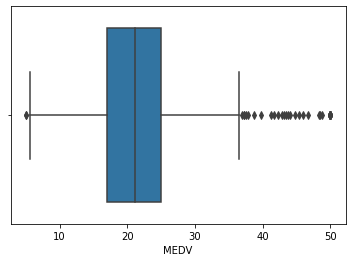

In [30]:
ax = sns.boxplot( x="MEDV", data=boston_df)

- #### Provide a  histogram for the Charles river variable

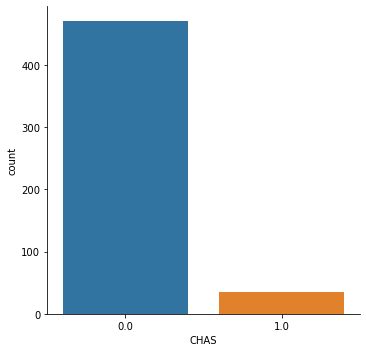

In [31]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

- #### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


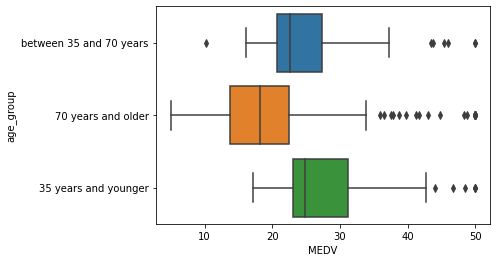

In [32]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)

- #### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

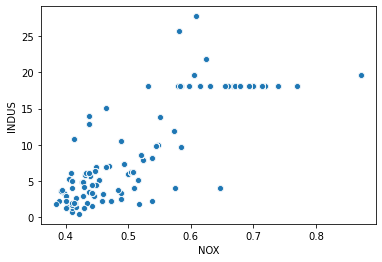

In [33]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

#The relationship between the variables seems to be linear up to NOX reaching the value of 0.6

- ##### Create a histogram for the pupil to teacher ratio variable

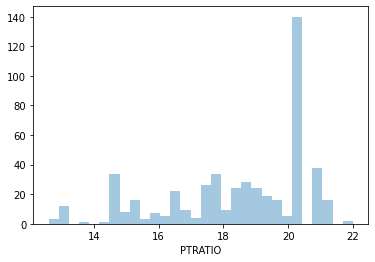

In [34]:
sns.distplot(a=boston_df.PTRATIO, bins=30, kde=False)
plt.show()

## Use the appropriate tests to answer the questions provided.

- #### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We state our null hypothesis that says there's no significant difference in MEDV bounded by CHAS, whereas the alternative hypothesis says there's a significant difference between the two values.


In [35]:
x = boston_df[boston_df['CHAS'] == 0]['MEDV']
y = boston_df[boston_df['CHAS'] == 1]['MEDV']

scipy.stats.ttest_ind(x, y, axis=0, equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Our p-value is less than 0.05, therefore we reject the Null Hypothesis since there's statistical difference between the two values.

- #### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We state our null hypothesis saying there's no difference between the values of MEDV and the three age spans in AGE, whereas the alternative hypothesis says there's at least one difference between them.

In [36]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, pvalue = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F-Statistic:{0}, P-value:{1}".format(f_statistic, pvalue))

F-Statistic:36.40764999196599, P-value:1.7105011022702984e-15


Since the p-value is less than 0.05, we reject the null hypothesis.

- #### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


We state the null hypothesis saying there's no relationship between NOX and INDUS values, whereas the alternative hypothesis says there's statistical relationship between the values.

In [37]:
cont_table = pd.crosstab(boston_df['NOX'],
                         boston_df['INDUS'])

scipy.stats.pearsonr(boston_df['NOX'],
                     boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Since the p-value < 0.05, we reject the null hypothesis and conclude there's actually a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

- #### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [38]:
X = pd.get_dummies(boston_df[['MEDV']])
y = boston_df['DIS']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
X = sm.add_constant(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        22:03:49   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We got the R-squared value, now we just need to calculate its square root.

In [39]:
import math
R_squared = 0.062
print(math.sqrt(R_squared))

0.24899799195977465


The square root value of R-squared is around 0.25, therefore it shows a weak correlation between the variables.